In [1]:
import numpy as np, matplotlib.pyplot as plt, os, scipy, math
from PIL import Image
from scipy import signal
from scipy.ndimage import gaussian_filter

In [4]:
FIGSIZE_W = 5
FIGSIZE_H = 3

def load_and_normalize(path):
  try:
    img = np.array(Image.open(path))
    img_0_1 = (img - np.min(img)) / (np.max(img) - np.min(img))
    img_rgb = np.expand_dims(img_0_1, 2).repeat(3, axis=2)
    return img_0_1, img_rgb
  except:
    raise Exception(f"Image {path} failed to load!!!\n" + 
      "Current working dir: {os.getcwd()}")
  
def display_imgs(imgs, titles):
  r, c = math.ceil(len(titles) / 3), 3
  fig, axs = plt.subplots(r, c, figsize=(FIGSIZE_W*3, FIGSIZE_H*r))
  fig.tight_layout()
  axs = axs.flatten()
  for i, (img, title) in enumerate(zip(imgs, titles)):
    axs[i].imshow(img, cmap="gray", vmin=0, vmax=1)
    axs[i].set_title(title)
  for j in range(len(imgs), r * c):
    fig.delaxes(axs[j])

def show_bounding_box(img, r1, r2, c1, c2):
  fig, axs = plt.subplots(1, 1, figsize=(FIGSIZE_W, FIGSIZE_H))
  fig.tight_layout()
  axs.imshow(img, cmap="gray")
  axs.set_title("Bounding Box")
  axs.plot([c1, c2], [r1, r1], color="r")
  axs.plot([c1, c2], [r2, r2], color="g")
  axs.plot([c1, c1], [r1, r2], color="b")
  axs.plot([c2, c2], [r1, r2], color="m")

def highlight_green(img, roots, mask):
  img_cpy = np.copy(img)
  img_cpy[:,:,1] += roots * mask
  return np.clip(img_cpy, 0, 1)

def save_img(img, path):
  img2 = (np.clip(img, 0, 1) * 255).astype(np.int8)
  im = Image.fromarray(img2, "RGB")
  im.save(path)

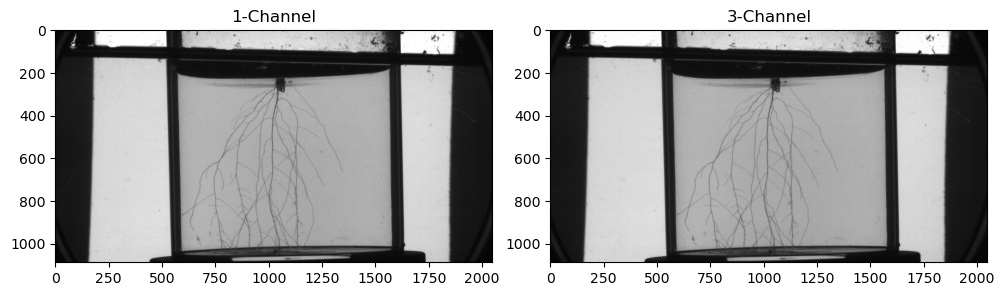

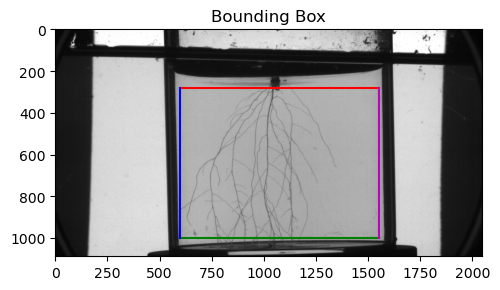

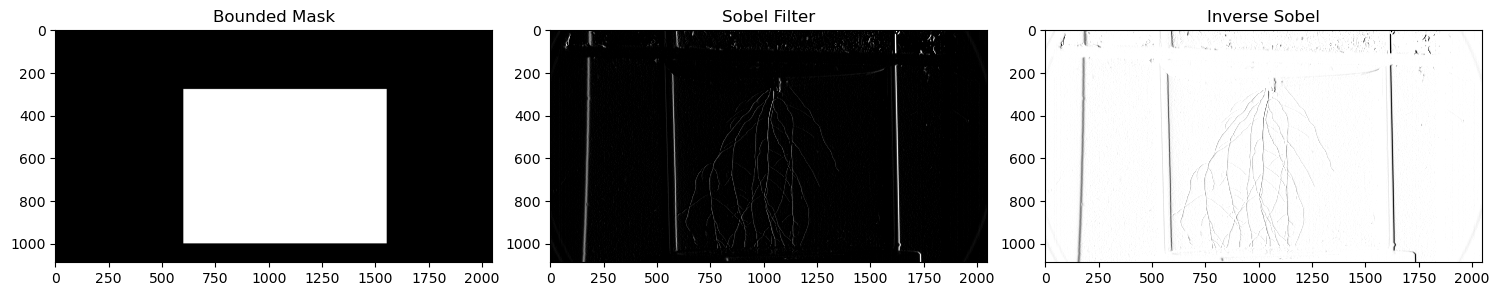

In [5]:
img_01, img_rgb = load_and_normalize("1.png")
img_sobel = scipy.ndimage.sobel(img_01)
img_inv_sobel = 1 - img_sobel

# img_01 = original grayscale image, 1 channel, values in 0 to 1
# img_rgb = same but rgb, repeat grayscale across r g b
# don't worry about sobel

display_imgs([img_01, img_rgb], ["1-Channel", "3-Channel"])

# Choose what region you want to bound
# R = row (vertical axies), C = column (horizontal axis)
# top-left = 0,0
r1, r2, c1, c2 = 280, 1000, 600, 1550
show_bounding_box(img_01, r1, r2, c1, c2)

bounded_mask = np.zeros_like(img_01)
bounded_mask[r1:r2+1,c1:c2+1] = 1

display_imgs([bounded_mask, img_sobel, img_inv_sobel], ["Bounded Mask", "Sobel Filter", "Inverse Sobel"])

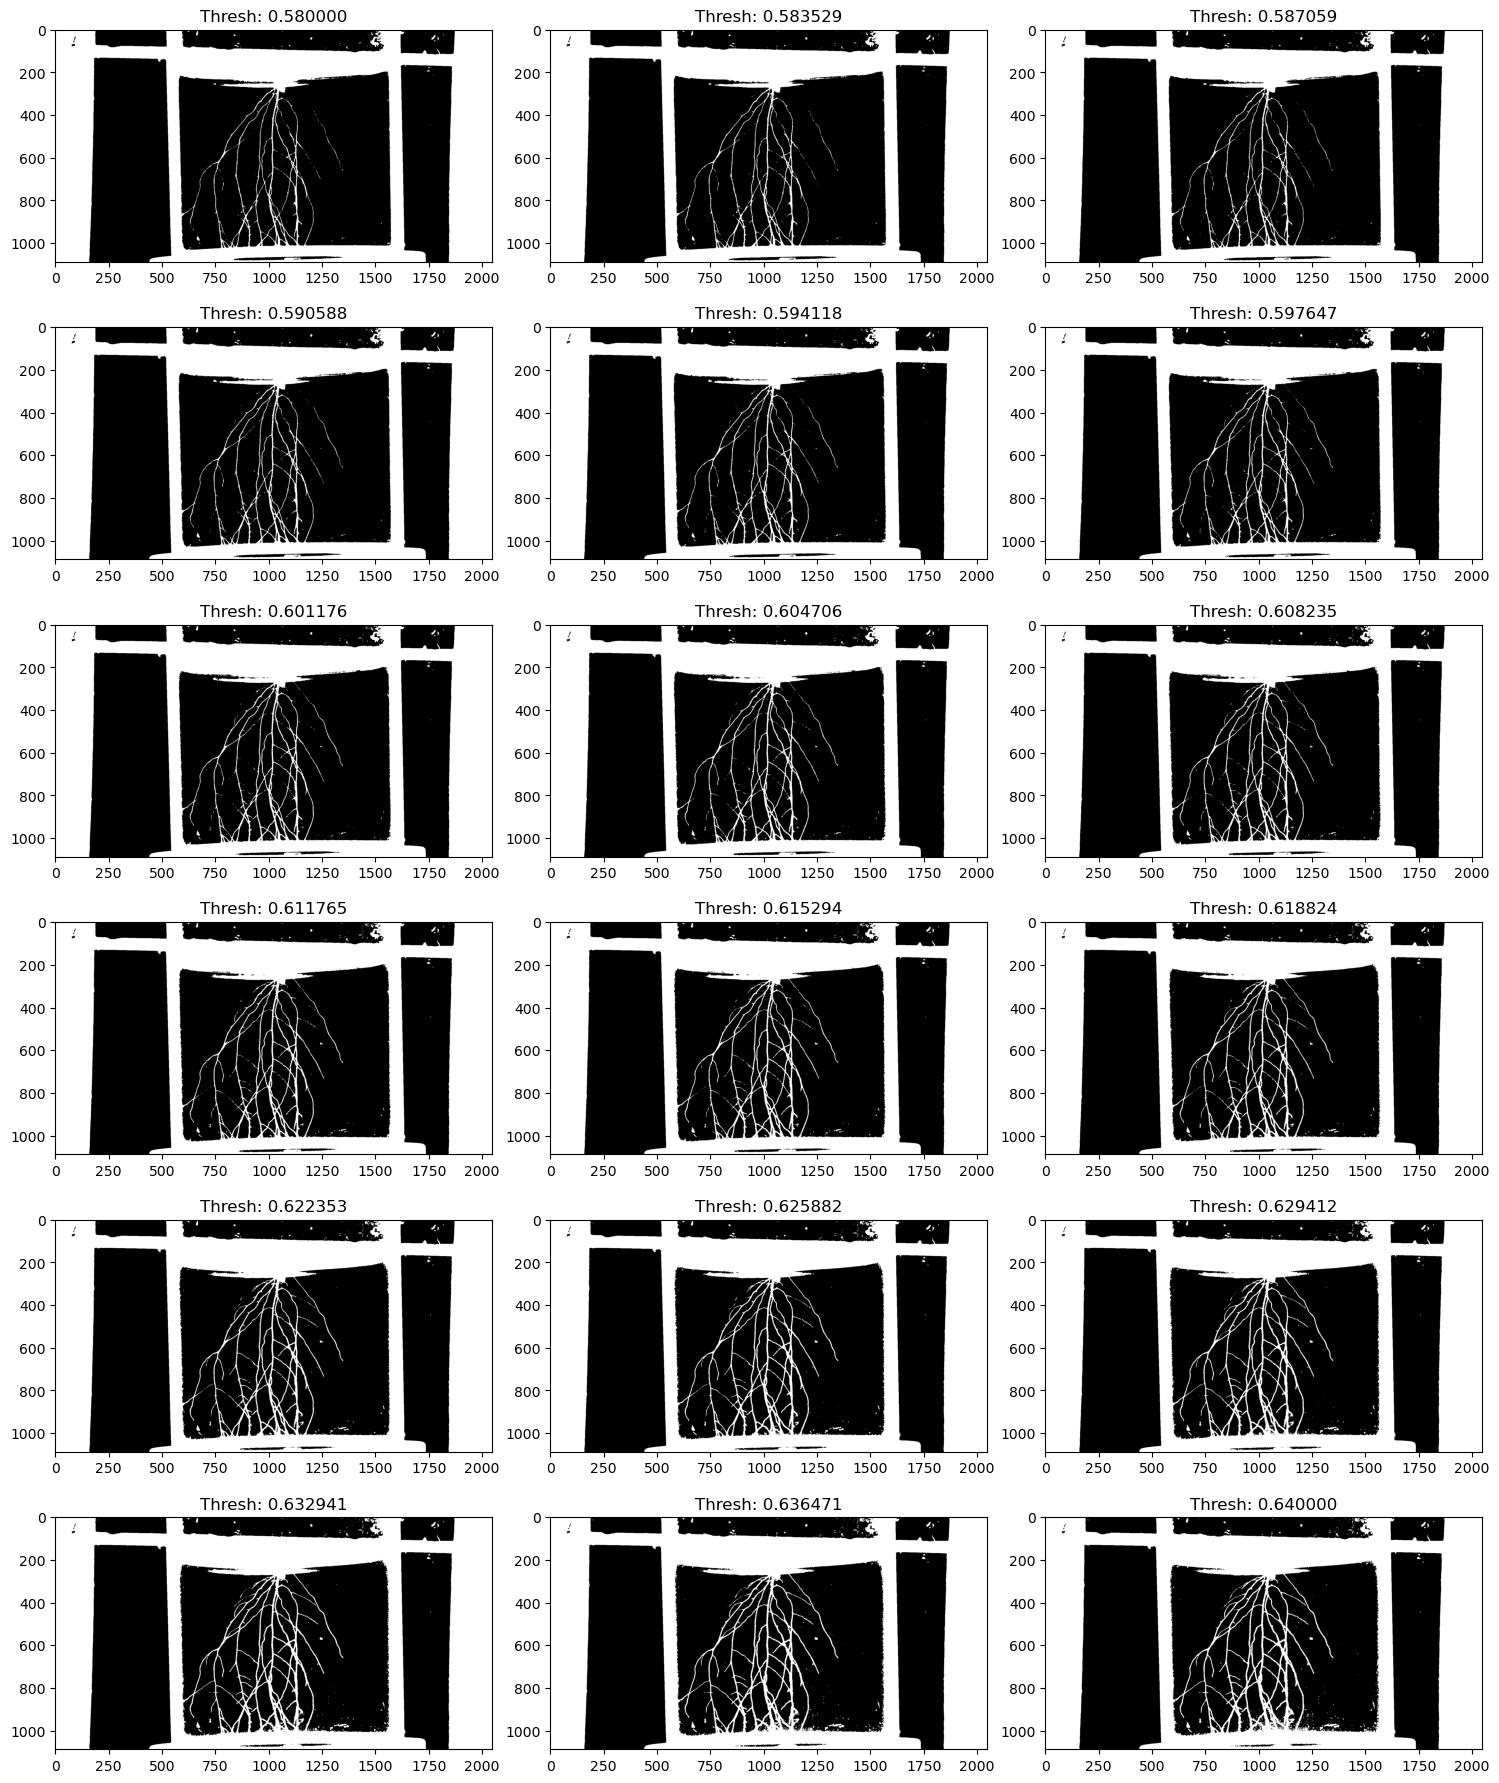

In [15]:
import operator
# Thresholding


thresh_ct = 18
thresh_lower = 0.58
thresh_upper = 0.64
# use one or the other, disable with a #

# === NO GAUSSIAN BLUR
# thresh_img = img_01

# === YES GAUSSIAN BLUR
thresh_sigma = 1
thresh_img = gaussian_filter(img_01, sigma=thresh_sigma)


thresh_op = operator.lt # use operator.lt (less than), operator.gt (greater than), operator.le, operator.ge


vals = np.linspace(thresh_lower, thresh_upper, thresh_ct)
# copy from thresh_op ... )
imgs = [thresh_op(thresh_img, i) for i in vals] # this creates the images
titles = [f"Thresh: {i:4f}" for i in vals]

display_imgs(imgs, titles)

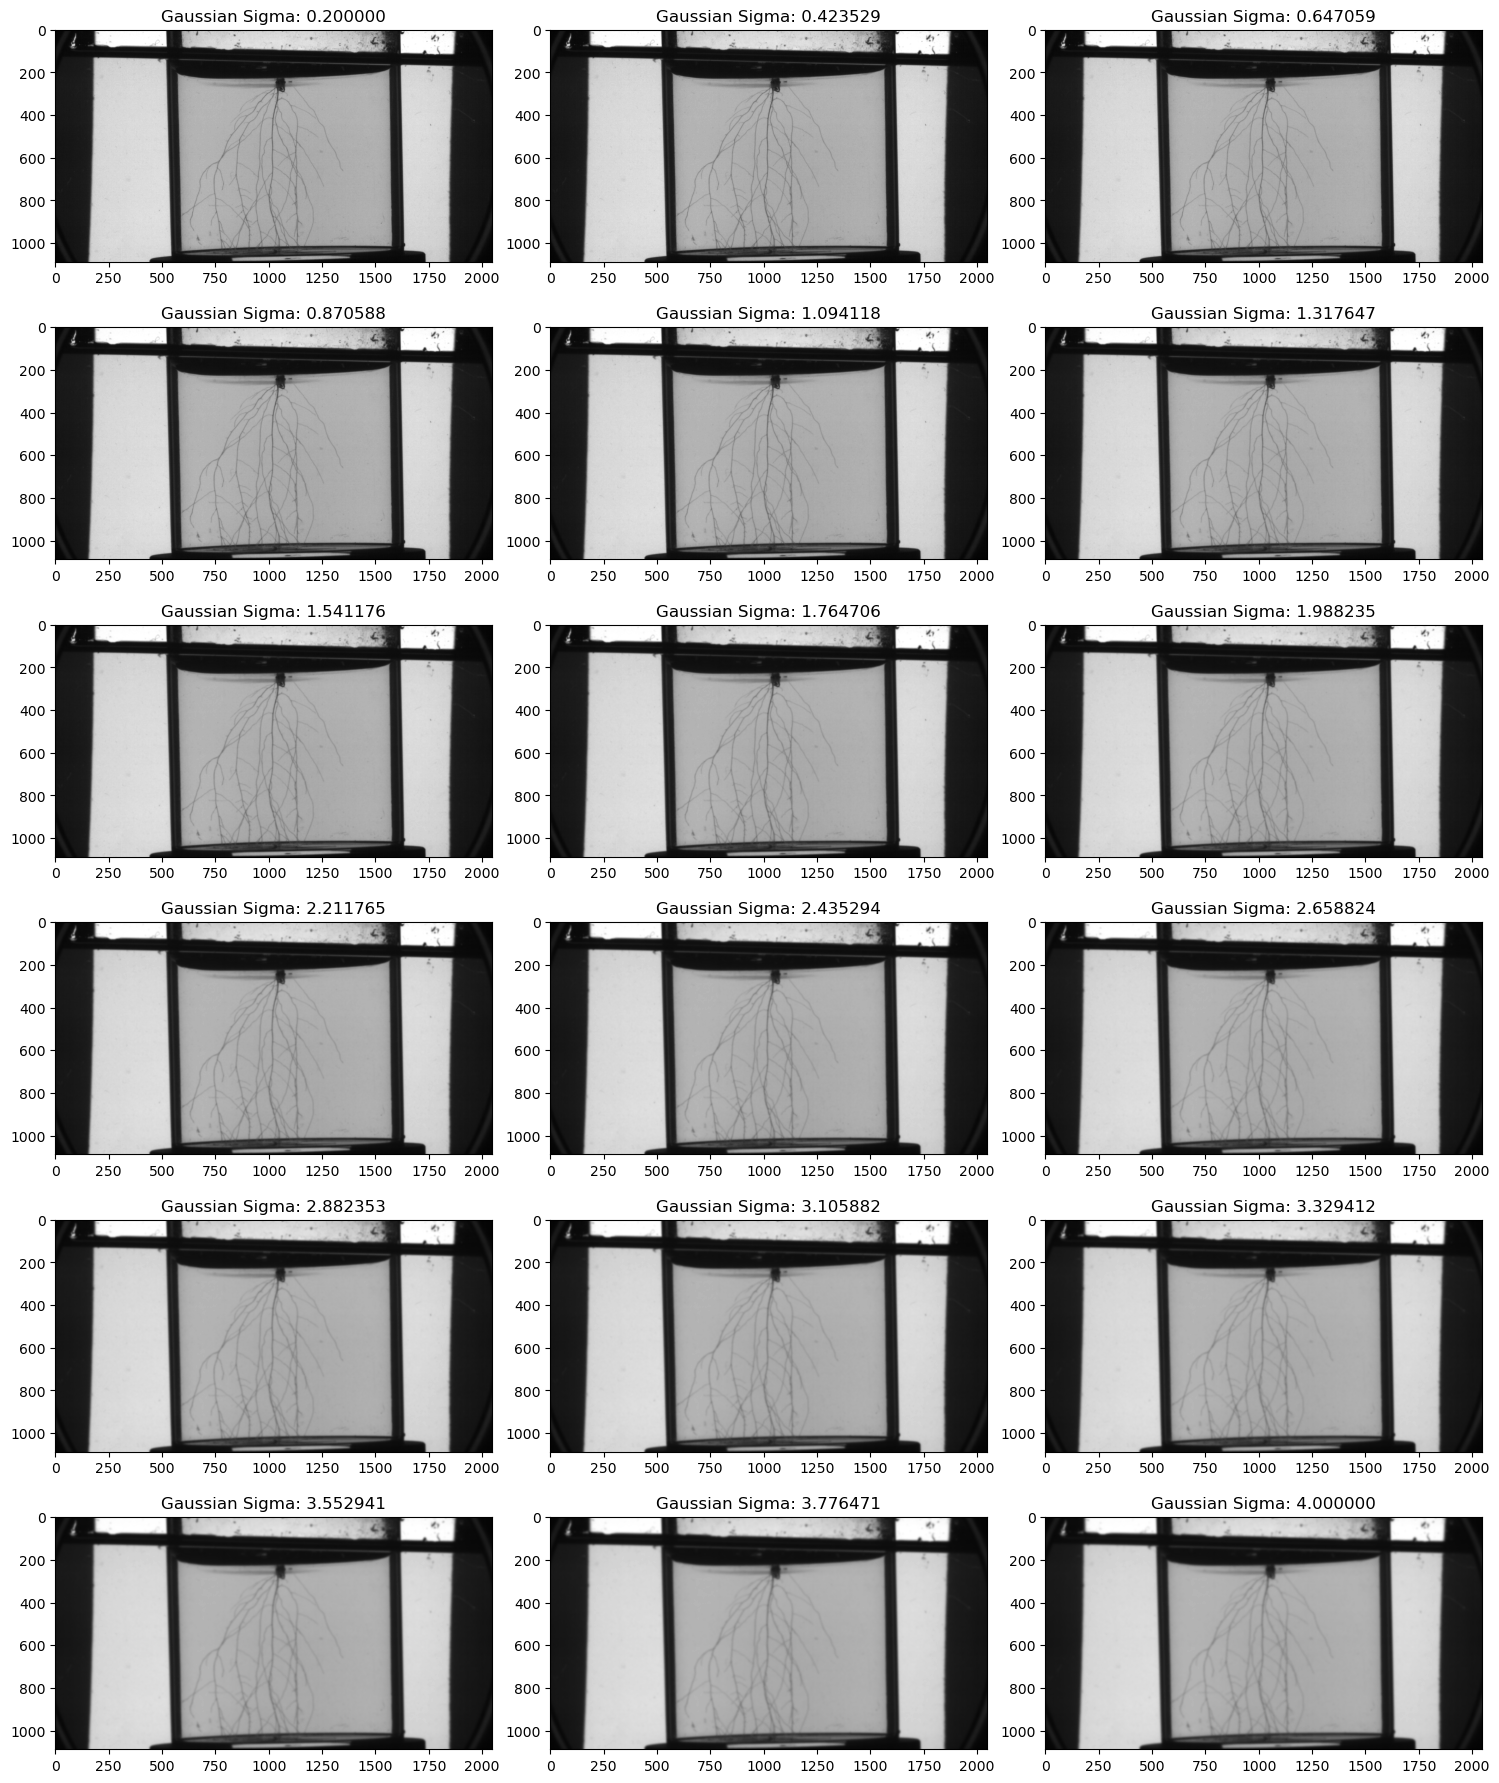

In [118]:
# Gaussian Blur

sigma_ct = 18
sigma_low = 0.2
sigma_high = 4

vals = np.linspace(sigma_low, sigma_high, sigma_ct)
imgs = [gaussian_filter(img_01, sigma=i) for i in vals]
titles = [f"Gaussian Sigma: {i:4f}" for i in vals]

display_imgs(imgs, titles)

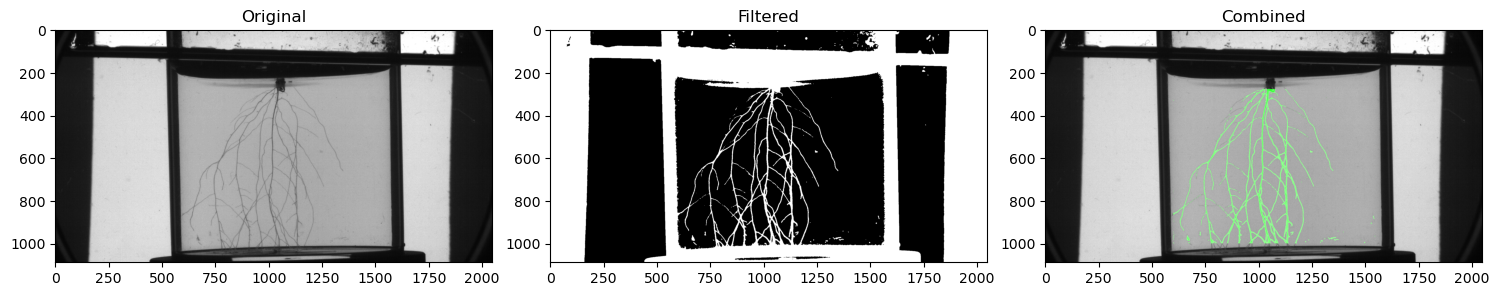

In [16]:
# Combine stuff here
# replace i with whatever value you choose

# Only touch to the right of `filtered = `...
filtered = thresh_op(gaussian_filter(img_01, sigma=thresh_sigma), 0.62)
output_file = "out.png"
# don't touch below

combined = highlight_green(img_rgb, filtered, bounded_mask)

display_imgs([img_01, filtered, combined], ["Original", "Filtered", "Combined"])
save_img(combined, output_file)

# AUTOMATION

In [19]:
import os

def process(img):
  # Some examples:
  # filtered = thresh_op(gaussian_filter(img_01, sigma=1), 0.62)
  # filtered = thresh_op(img_01, 0.62)

  # === ONLY TOUCH BELOW
  return <PUT STUFF HERE CYRUS>
  # === ONLY TOUCH ABOVE

# === AUTOMATION GO BRRRR
for file in os.listdir("inputs"):
  if file == ".gitkeep":
    continue

  print(f"Automating {file}")
  img_01, img_rgb = load_and_normalize(os.path.join("inputs", file))

  r1, r2, c1, c2 = 280, 1000, 600, 1550

  bounded_mask = np.zeros_like(img_01)
  bounded_mask[r1:r2+1,c1:c2+1] = 1

  filtered = process(img_01)
  
  combined = highlight_green(img_rgb, filtered, bounded_mask)

  save_img(combined, os.path.join("outputs", file))  
  

Automating 1.png
Automating 2.png
Automating 3.png
Automating 4.png
Automating 5.png
